## ML Lab Midsem Section 2
#### Dataset: Breast Cancer Wisconsin (Diagnostic) Data Set
#### Name: Rajath C Aralikatti
#### Roll No: 181CO241

## About KNN
- The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. It's easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.

## Import the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

## Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Dataset

In [3]:
df = pd.read_csv('./Data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Cleaning

In [4]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
# Dropping Unnecessary Columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [6]:
print(df.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [7]:
# Checking for entries with missing data 
print(df.isna().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


## Datset Information

In [8]:
print(df.groupby('diagnosis').size())

diagnosis
B    357
M    212
dtype: int64


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Replacing String Data with Numeric Data

- Column: diagnosis<br>
>B (Benign) : 0<br>
>M (Malignant) : 1<br><br>

In [10]:
df = df.replace(to_replace='B', value=0)
df = df.replace(to_replace='M', value=1)

In [11]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Splitting data between Train and Test sets

In [12]:
y = df.pop('diagnosis')
x = df

In [13]:
# Converting Data frame to numpy array
x = x.to_numpy()
y = y.to_numpy()

print('Dimensions and datatype of')
print('x:', x.shape, '\tdtype:', x.dtype)
print('y:', y.shape, '\tdtype:', y.dtype)

Dimensions and datatype of
x: (569, 30) 	dtype: float64
y: (569,) 	dtype: int64


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

In [15]:
print('Dimensions, datatype and Range of')

print('x_train:', x_train.shape, '\tdtype:', x_train.dtype, '\tRange:', x_train.min(), 'to', x_train.max())
print('y_train:', y_train.shape, '\tdtype:', y_train.dtype, '\tRange:', y_train.min(), 'to', y_train.max())

print('x_test:', x_test.shape, '\tdtype:', x_test.dtype, '\tRange:', x_test.min(), 'to', x_train.max())
print('y_test:', y_test.shape, '\t\tdtype:', y_test.dtype, '\tRange:', y_test.min(), 'to', y_test.max())

Dimensions, datatype and Range of
x_train: (398, 30) 	dtype: float64 	Range: 0.0 to 4254.0
y_train: (398,) 	dtype: int64 	Range: 0 to 1
x_test: (171, 30) 	dtype: float64 	Range: 0.0 to 4254.0
y_test: (171,) 		dtype: int64 	Range: 0 to 1


## Normalize the data

In [16]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

In [17]:
print('Feature wise Mean on x_train\n', mean)
print('Feature wise Standard Deviation on x_train\n', std)

Feature wise Mean on x_train
 [1.41094950e+01 1.93698995e+01 9.18696231e+01 6.53825377e+02
 9.61944472e-02 1.03156508e-01 8.87899113e-02 4.86478894e-02
 1.80676884e-01 6.26933668e-02 4.06794724e-01 1.21662513e+00
 2.88823894e+00 4.06993543e+01 6.93425377e-03 2.47253166e-02
 3.10834286e-02 1.15448945e-02 2.03326583e-02 3.74951633e-03
 1.62332312e+01 2.57728392e+01 1.07088894e+02 8.75614824e+02
 1.31921482e-01 2.51775930e-01 2.71966148e-01 1.13276058e-01
 2.89340201e-01 8.38567839e-02]
Feature wise Standard Deviation on x_train
 [3.53505912e+00 4.40982001e+00 2.45065922e+01 3.55191136e+02
 1.40617772e-02 5.38714411e-02 8.26872278e-02 4.03044251e-02
 2.73226509e-02 6.83520654e-03 2.94239608e-01 5.45118878e-01
 2.18129954e+00 4.89799016e+01 2.93554590e-03 1.69708938e-02
 2.73884894e-02 6.08508407e-03 8.18903917e-03 2.55913536e-03
 4.77368400e+00 6.19109011e+00 3.35345034e+01 5.59080984e+02
 2.26127694e-02 1.58488327e-01 2.14918037e-01 6.70729451e-02
 6.10132306e-02 1.82624678e-02]


In [18]:
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [19]:
print('Dimensions and datatype of')

print('x_train:', x_train.shape, '\tdtype:', x_train.dtype, '\tRange:', x_train.min(), 'to', x_train.max())
print('y_train:', y_train.shape, '\tdtype:', y_train.dtype, '\tRange:', y_train.min(), 'to', y_train.max())

print('x_test:', x_test.shape, '\tdtype:', x_test.dtype, '\tRange:', x_test.min(), 'to', x_train.max())
print('y_test:', y_test.shape, '\t\tdtype:', y_test.dtype, '\tRange:', y_test.min(), 'to', y_test.max())

Dimensions and datatype of
x_train: (398, 30) 	dtype: float64 	Range: -3.098075486715361 to 10.238906754248953
y_train: (398,) 	dtype: int64 	Range: 0 to 1
x_test: (171, 30) 	dtype: float64 	Range: -2.7331493043925685 to 10.238906754248953
y_test: (171,) 		dtype: int64 	Range: 0 to 1


## KNN Implementation from Scratch

In [20]:
# KNN - Metric is Euclidian distance
from scipy import stats

def knn_fun(k=3):
  pred = []
  for x in x_test:
    dist = np.sum((x - x_train)**2, axis=1)
    sorted_dist = np.argsort(dist)
    neighbor_classes = []
    for i in range(k):
      neighbor_classes.append(y_train[sorted_dist[i]])
    pred.append(stats.mode(neighbor_classes)[0][0])
        
  return(accuracy_score(y_test, pred), pred)

In [21]:
# Running KNN for k = 1 to 15 and choosing the best k value

best_pred = []
best_acc = float('-inf')
best_k = -1

k_list = []
acc_list = []

for i in range(1, 16):
  acc, pred = knn_fun(i)
  k_list.append(i)
  acc_list.append(acc)
  if(acc > best_acc):
    best_acc = acc
    best_k = i
    best_pred = pred

Text(0.5, 1.0, 'K value (x-axis) vs Testing Accuracy (y-axis)')

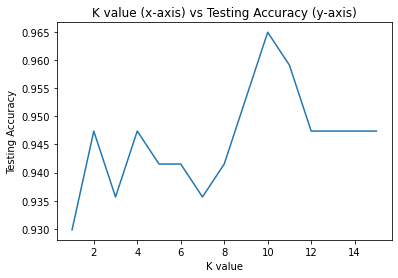

In [22]:
plt.plot(k_list, acc_list)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')
plt.title('K value (x-axis) vs Testing Accuracy (y-axis)')

In [23]:
print('K Value with best accuracy', best_k)
print('Note: If multiple K values give the same accuracy, the lowest such K is printed\n')
print('Ground Truth')
print(y_test, '\n')
print('Best Prediction')
print(np.array(best_pred), '\n')

K Value with best accuracy 10
Note: If multiple K values give the same accuracy, the lowest such K is printed

Ground Truth
[0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1
 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1
 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0] 

Best Prediction
[0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1
 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1
 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0] 



In [24]:
print('Best Results: k =', best_k)
print(classification_report(y_test, pred))
print('Accuracy is', best_acc*100, '%')

Best Results: k = 10
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.95      0.91      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy is 96.49122807017544 %


##  Using Scikit Learn Inbuilt KNN Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

def knn_fun(k=3):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  pred = knn.predict(x_test)
  return(accuracy_score(y_test, pred), pred)

In [26]:
# Running KNN for k = 1 to 15 and choosing the best k value

best_pred = []
best_acc = float('-inf')
best_k = -1

k_list = []
acc_list = []

for i in range(1, 16):
  acc, pred = knn_fun(i)
  k_list.append(i)
  acc_list.append(acc)
  if(acc > best_acc):
    best_acc = acc
    best_k = i
    best_pred = pred

Text(0.5, 1.0, 'K value (x-axis) vs Testing Accuracy (y-axis)')

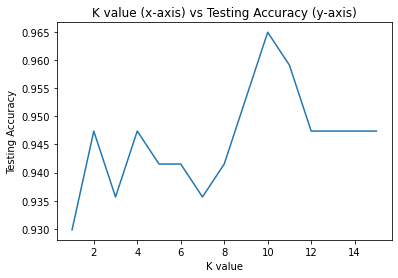

In [27]:
plt.plot(k_list, acc_list)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')
plt.title('K value (x-axis) vs Testing Accuracy (y-axis)')

In [28]:
print('K Value with best accuracy', best_k)
print('Note: If multiple K values give the same accuracy, the lowest such K is printed\n')
print('Ground Truth')
print(y_test, '\n')
print('Best Prediction')
print(best_pred, '\n')

K Value with best accuracy 10
Note: If multiple K values give the same accuracy, the lowest such K is printed

Ground Truth
[0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1
 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1
 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0] 

Best Prediction
[0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1
 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1
 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0] 



In [29]:
print('Best Results: k =', best_k)
print(classification_report(y_test, pred))
print('Accuracy is', best_acc*100, '%')

Best Results: k = 10
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.95      0.91      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy is 96.49122807017544 %


## Results
- Both my implementation and scikit learn yield the identical results.
- Best accuracy is achieved with k = 10.
- Accuracy: 96.5%
- Class 0 (Benign): F1 Score = 0.96, Precision = 0.95, Recall = 0.97
- Class 1 (Malignant): F1 Score = 0.93, Precision = 0.95, Recall = 0.91
- Train: Test = 70: 30 (Stratified)
- Benign: Malignant = 357: 212. Since the classes aren't balanced the F1 scores are a better parameter for performance of the model.

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[104,   3],
       [  6,  58]])

In [31]:
print('Best Results: k =', best_k)
print(classification_report(y_test, pred))
print('Accuracy is', best_acc*100, '%')

Best Results: k = 10
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.95      0.91      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy is 96.49122807017544 %
